# importing packages


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import cufflinks as cf
cf.go_offline()
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [4]:
#reading the data set
df=pd.read_csv("titanic_train.csv")

In [5]:
#check the top 5 values of the data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#check the top tail values
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#check the shape of the data set
df.shape

(891, 12)

In [8]:
#there are 891 rows and 12 columns
#check the size of the data set
df.size

10692

In [9]:
#now check the column names in the data set
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#in the data set the target column is the survived class
#now chec the data types in the data set
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#now check the null values in the data set
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#there are some null values in the data set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
#now check the unwanted columns and try to remove that unwanted columns like paasenger id
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


# lets see some data visualization

<Axes: >

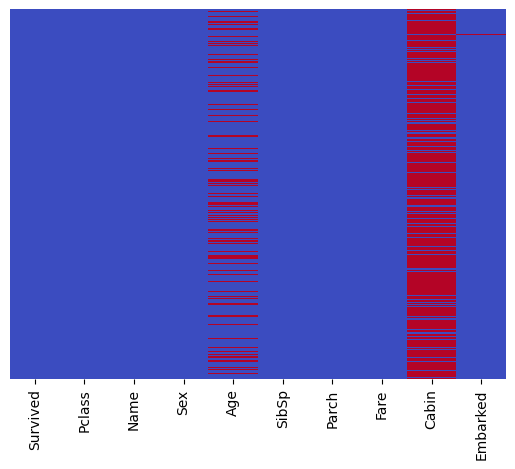

In [17]:
#now try to plot the nul values that are present in the data set
sns.heatmap(df.isna(),yticklabels=False,cmap='coolwarm',cbar=False)

In [18]:
#as you can see the above plot the brown color lines are all the null values

In [19]:
#there are more null values in the column cabin so it is not usefull but the column age we can handle so remove the column Cabin

In [20]:
df.drop("Cabin",axis=1,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

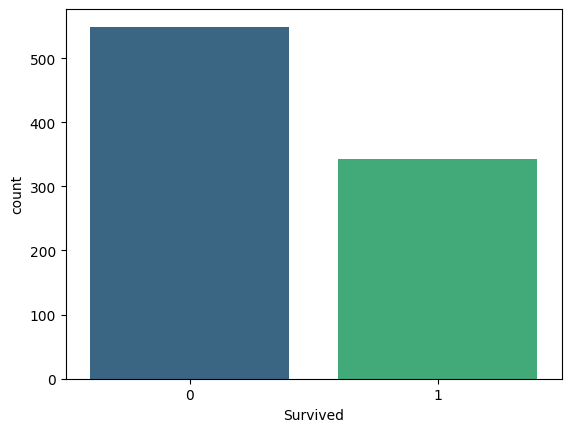

In [24]:
#now lets check our data set is balanced or not by using the survived class
sns.countplot(x='Survived',data =df,palette='viridis',saturation=0.8)

In [25]:
#so from the above garoph we can say maximum number of people are died 

<Axes: xlabel='Survived', ylabel='count'>

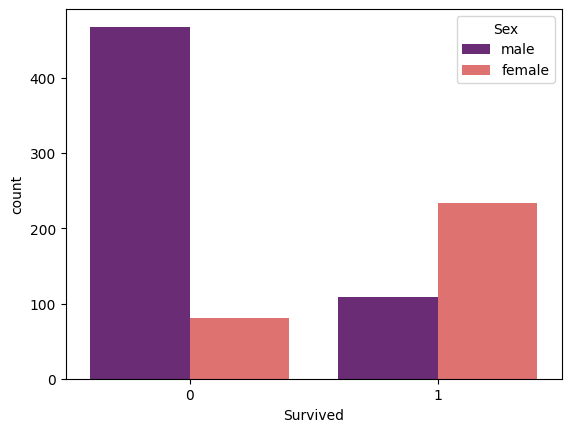

In [28]:
sns.countplot(x="Survived",data =df,hue='Sex',palette='magma')

<Axes: xlabel='Survived', ylabel='count'>

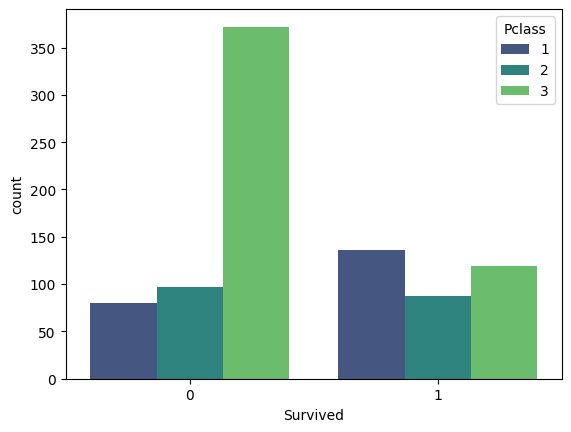

In [29]:
sns.countplot(x='Survived',data=df,hue='Pclass',palette='viridis')

In [30]:
#from the above garaphs we can maximum number of people died in the acident are mens who are staying the 3rd class

In [31]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Survived', ylabel='count'>

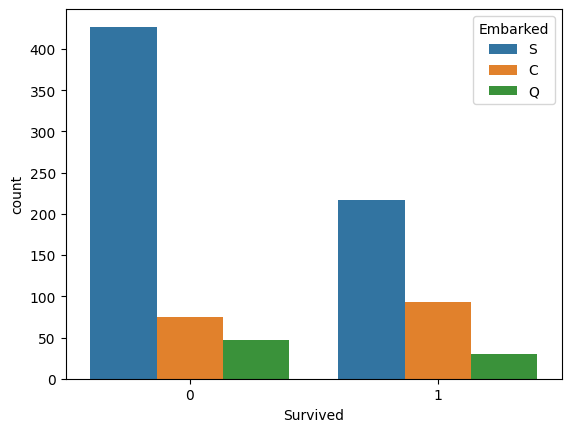

In [33]:
sns.countplot(x='Survived',data=df,hue='Embarked')

In [34]:
#in embarked maximum people are s class

In [37]:
#le us see the distributions plots of the columns 
df['Age'].iplot(kind='hist',bins=30)

In [38]:
#so by the above one we can say that the people travelled are between the age of the from 20 -40 age group people

In [41]:
df['Fare'].iplot(kind='hist',bins=30)

In [42]:
#the people who travelled are cheap cost


<Axes: xlabel='Pclass', ylabel='Age'>

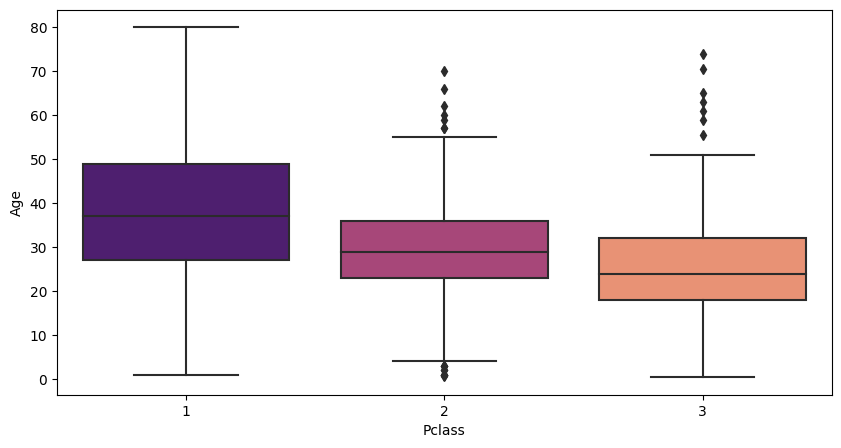

In [47]:
#let us draw the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=df,palette='magma')

In [48]:
#now we have to handle the null values in the data 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
        

In [50]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [51]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [52]:
#there are less values in the Embarked column so we can remove that null values 

In [53]:
df.dropna(inplace=True)

In [54]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [55]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [56]:
#we also dont need the column name so we can remove that
df.drop("Name",axis=1,inplace=True)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
#now we have  to handle the categorical columns using the one hat encoding technique
cat=df.select_dtypes(exclude=np.number)

In [59]:
cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [76]:
cat=pd.get_dummies(cat,drop_first=True)

In [77]:
cat=cat.astype('int')

In [78]:
#now concat these witt the numerical data set
num=df.select_dtypes(include=np.number)

In [74]:
num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


<Axes: >

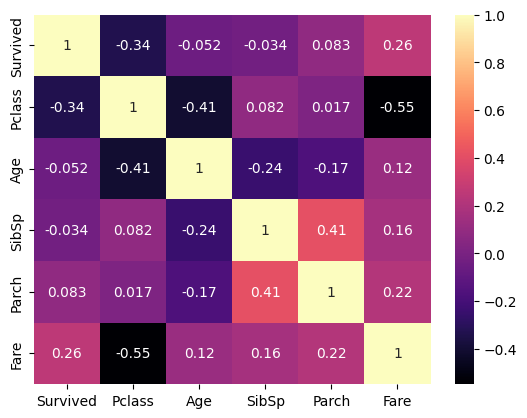

In [99]:
sns.heatmap(num.corr(),annot=True,cmap='magma')

In [80]:
cat.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [81]:
data=pd.concat([cat,num],axis=1)

In [82]:
data.head()

,Sex_male,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,0,3,22.0,1,0,7.2500
1,0,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,35.0,1,0,53.1000
4,1,0,1,0,3,35.0,0,0,8.0500


In [84]:
#so let us divide the data set into two variables 
x=data.drop('Survived',axis=1)
y=data['Survived']

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(622, 8)
(622,)
(267, 8)
(267,)


In [89]:
#now let us import the model logistic Regression
lr=LogisticRegression()

In [90]:
lr.fit(x_train,y_train)

LogisticRegression()

In [91]:
pred=lr.predict(x_test)

In [92]:
pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [93]:
#let us print the classificatiion report 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       168
           1       0.77      0.76      0.76        99

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



<Axes: >

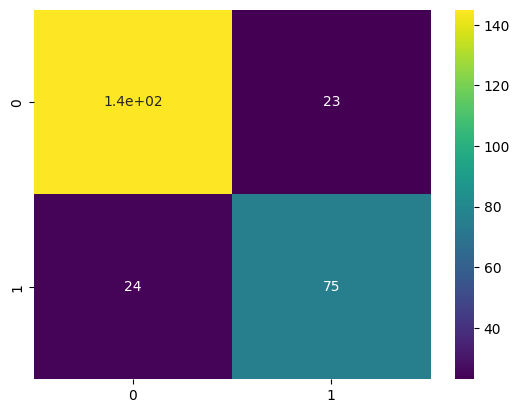

In [95]:
#now let us draw the confusion matrix
sns.heatmap(confusion_matrix(y_test,pred),cmap='viridis',annot=True)

In [96]:
#this is the __________________________________end________________________________________________________________________